In [1]:
using Pkg; Pkg.activate("../");
using LatticeLab

In [2]:
d1 = [ sqrt(3)/2, 1/2]
d2 = [-sqrt(3)/2, 1/2]
d3 = [         0,  -1] ;

In [4]:
BBOX(m,n) = ([-0.00021,-0.0001], # origin
             [1 0 ; 0 1],                 # supercell basis
             [m,n],                       # supercell shifts
             [true,true])                 # P.B.C. conditions

UC_Honeycomb = LatticeLab.UnitCell(
    2,                  # dimension
    2,                  # number of sublattices
    [sqrt(3) sqrt(3)/2 
     0             3/2],# Bravais basis
    [0       sqrt(3)/2
     0             1/2],# sublattice coordinates  
    [ :A,    :B  ],     # sublattice symbols
    [[:pz], [:pz]]      # orbits 
) ;

UC_LN = LatticeLab.link_info_by_distance_direction(
    Dict( :tr => (1,[d1,-d1]),
          :tg => (1,[d2,-d2]),
          :tb => (1,[d3,-d3]), ), # symbol => (distance, (directions))
    UC_Honeycomb;
    bounding_box = BBOX(1,1),
    rounding_digits=12
) ;

In [5]:
Graphene = build_lattice(UC_LN,BBOX(3,3)) ;

┌ Info: build_lattice() : 
│ 		 margin = 1
└ @ LatticeLab /home/dabajabaza/jianguoyun/Nutstore/LatticeLab/src/lattice/build_lattice.jl:256
┌ Info: generate_R0_compute_EqV() : 
│ 		 bbox = ([-0.00021, -0.0001], [1 0; 0 1], [3, 3], Bool[1, 1])
│ 		 N_min, N_max = ([-2, -2], [5, 5])
└ @ LatticeLab /home/dabajabaza/jianguoyun/Nutstore/LatticeLab/src/lattice/build_lattice.jl:39
┌ Info: generate_R0_compute_EqV() : compute EqV ...
└ @ LatticeLab /home/dabajabaza/jianguoyun/Nutstore/LatticeLab/src/lattice/build_lattice.jl:53


  0.364391 seconds (1.12 M allocations: 65.246 MiB, 5.69% gc time, 99.05% compilation time)


┌ Info: generate_f() : main loop ...
└ @ LatticeLab /home/dabajabaza/jianguoyun/Nutstore/LatticeLab/src/lattice/build_lattice.jl:180


  0.623223 seconds (2.44 M allocations: 127.993 MiB, 4.97% gc time, 99.93% compilation time)


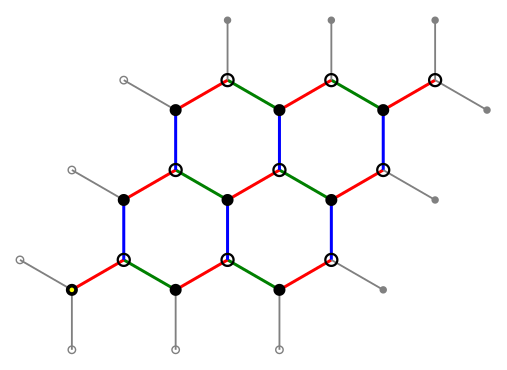

In [6]:
VSTYLE = Dict(
    :A=>("black",6.0,:dot),
    :B=>("black",6.0,:circle)
)
ESTYLE = Dict(
    :tr=>("red",  3.0,:solid),
    :tg=>("green",3.0,:solid),
    :tb=>("blue", 3.0,:solid),
)
display("image/svg+xml", show_lattice_svg(Graphene, VSTYLE, ESTYLE; upscale=60))

In [1]:
pwd()

"/home/dabajabaza/jianguoyun/Nutstore/LatticeLab/examples"